In [3]:
#The task question here we try to figure out, is that by exploring out dataset
#which ways is more profitable for the e-commerce company, the Mobile App or the Website

# First we import the libraries we need for this project

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#Then we import the OS module
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [11]:
#Then we read in the input file we downloaded before

data = pd.read_csv(os.path.join(r'D:\kaggle\input\focusing-on-mobile-app-or-website', 'Ecommerce Customers.csv'))
data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [12]:
# Next let us check which kind of data we are dealing with

data.describe(include='all')

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500,500,500,500.000000,500.000000,500.000000,500.000000,500.000000
unique,500,500,138,NaN,NaN,NaN,NaN,NaN
top,mfoster@brown-white.com,"05302 Dunlap Ferry\nNew Stephaniehaven, MP 42268",CadetBlue,NaN,NaN,NaN,NaN,NaN
freq,1,1,7,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,33.053194,12.052488,37.060445,3.533462,499.314038
std,NaN,NaN,NaN,0.992563,0.994216,1.010489,0.999278,79.314782
min,NaN,NaN,NaN,29.532429,8.508152,33.913847,0.269901,256.670582
25%,NaN,NaN,NaN,32.341822,11.388153,36.349257,2.930450,445.038277
50%,NaN,NaN,NaN,33.082008,11.983231,37.069367,3.533975,498.887875
75%,NaN,NaN,NaN,33.711985,12.753850,37.716432,4.126502,549.313828


In [13]:
#As we review the info above, we can see there are a lot of unique values in column 'Email', 'Address' and 'Avatar'
#And these values do not help with the task, so we choose to drop these columns

data.drop(columns=['Email','Address','Avatar'], axis=1, inplace=True)
data

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573,573.847438
496,34.702529,11.695736,37.190268,3.576526,529.049004
497,32.646777,11.499409,38.332576,4.958264,551.620145
498,33.322501,12.391423,36.840086,2.336485,456.469510


In [14]:
#Next let us check the missing data we are dealing with
#Usually if a missing values is under 5% we can choose to drop them

data.isnull().sum()

Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

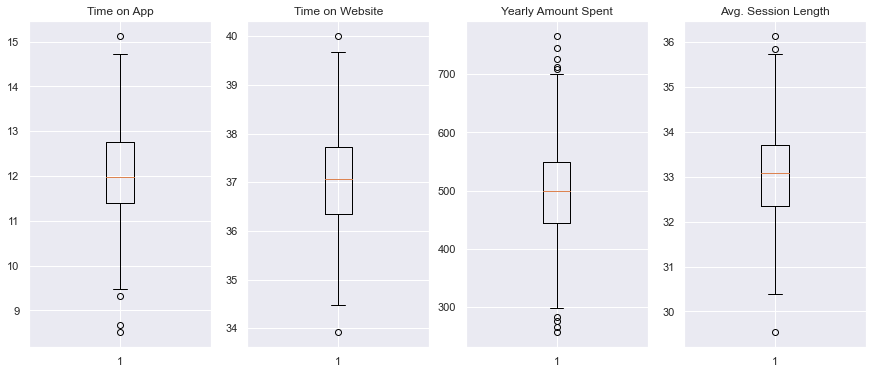

In [15]:
#Outliers here we handle, since they would be effect out decision.
#We will use Boxplot and Internal Quartile Range/IQR to clean them this time.

f, (ax1, ax2, ax3,ax4,) = plt.subplots(1, 4,figsize=(15,6))
ax1.boxplot(data['Time on App'])
ax1.set_title('Time on App')
ax2.boxplot(data['Time on Website'])
ax2.set_title('Time on Website')
ax3.boxplot(data['Yearly Amount Spent'])
ax3.set_title('Yearly Amount Spent')
ax4.boxplot(data['Avg. Session Length'])
ax4.set_title('Avg. Session Length')
plt.show()

<AxesSubplot:>

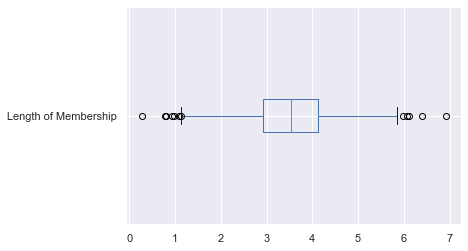

In [16]:
#This is for the Length of Membership below

data['Length of Membership'].plot(kind='box',vert=False)

In [17]:
#We are going to use the Internal Quartile Range/IQR to remove the Outliers above
#In short, statistically we remove the values Larger than Q3+1.5*IQR and Smaller than Q1-1.5*IQR

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

data = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
data

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573,573.847438
496,34.702529,11.695736,37.190268,3.576526,529.049004
497,32.646777,11.499409,38.332576,4.958264,551.620145
498,33.322501,12.391423,36.840086,2.336485,456.469510


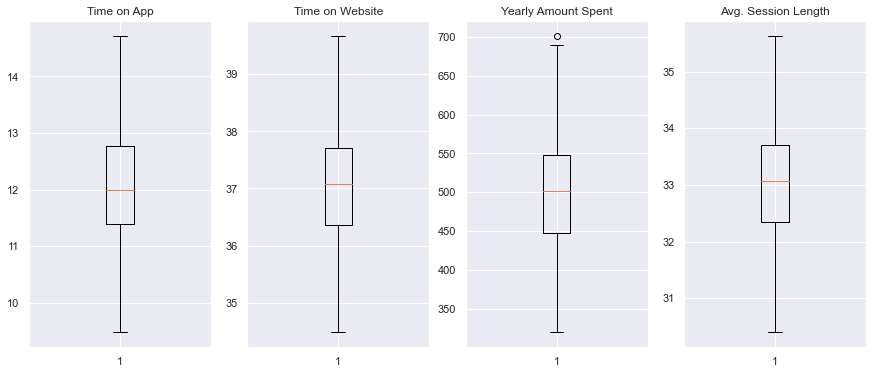

In [18]:
#Now let us see the result of removing Outliers

f, (ax1, ax2, ax3,ax4,) = plt.subplots(1, 4,figsize=(15,6))
ax1.boxplot(data['Time on App'])
ax1.set_title('Time on App')
ax2.boxplot(data['Time on Website'])
ax2.set_title('Time on Website')
ax3.boxplot(data['Yearly Amount Spent'])
ax3.set_title('Yearly Amount Spent')
ax4.boxplot(data['Avg. Session Length'])
ax4.set_title('Avg. Session Length')
plt.show()

<AxesSubplot:xlabel='Length of Membership', ylabel='Count'>

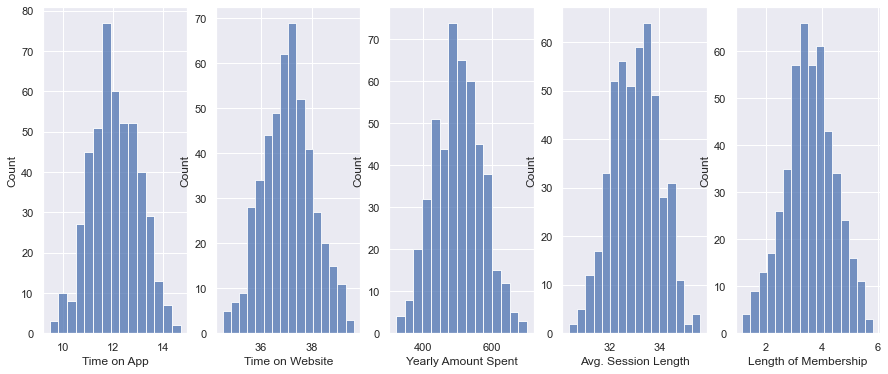

In [19]:
#Next we check whether our data follows the Normal Distribution or not.
#Histogram here we use.

f, ax = plt.subplots(1, 5,figsize=(15,6))
sns.histplot(data['Time on App'],ax=ax[0])
sns.histplot(data['Time on Website'],ax=ax[1])
sns.histplot(data['Yearly Amount Spent'],ax=ax[2])
sns.histplot(data['Avg. Session Length'],ax=ax[3])
sns.histplot(data['Length of Membership'],ax=ax[4])

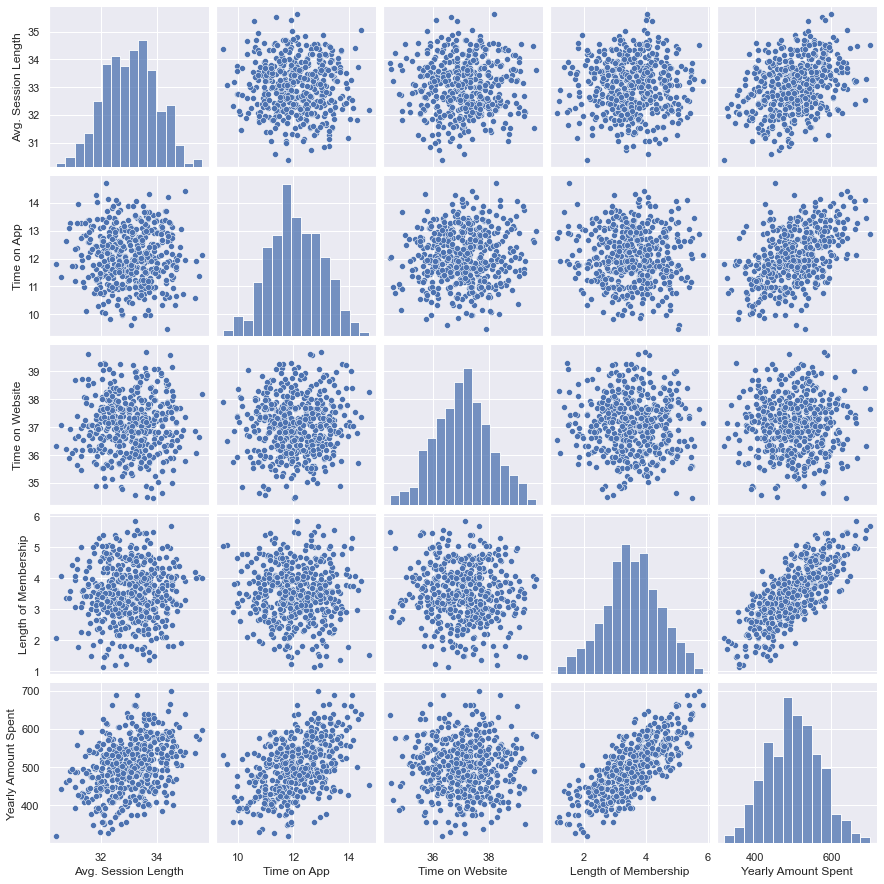

In [20]:
#Down below we will use Seaborn Pairplot to build a matrix for these 5 variables we are using right now

sns.pairplot(data)
plt.show()

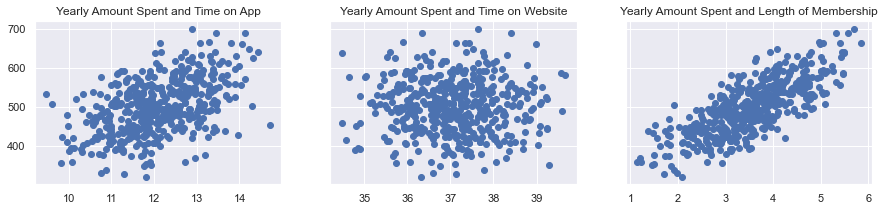

In [21]:
#Scatter Plots we can use here as well, to see the relations between two different variables
#Here we only build 3 Scatter Plots

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y
ax1.scatter(data['Time on App'],data['Yearly Amount Spent'])
ax1.set_title('Yearly Amount Spent and Time on App')
ax2.scatter(data['Time on Website'],data['Yearly Amount Spent'])
ax2.set_title('Yearly Amount Spent and Time on Website')
ax3.scatter(data['Length of Membership'],data['Yearly Amount Spent'])
ax3.set_title('Yearly Amount Spent and Length of Membership')

plt.show()

In [22]:
#Our data follows the Normal Distribution, they are cleaned and have no missing values
#The final step, we figure out whether Mobile App or Website is more profitable
#Once again, we will use Correlation Coefficient to find out the answer

data.corr()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.038177,-0.004834,0.013809,0.339804
Time on App,-0.038177,1.000000,0.065210,-0.054382,0.475560
Time on Website,-0.004834,0.065210,1.000000,-0.046572,0.000581
Length of Membership,0.013809,-0.054382,-0.046572,1.000000,0.767651
Yearly Amount Spent,0.339804,0.475560,0.000581,0.767651,1.000000


<AxesSubplot:>

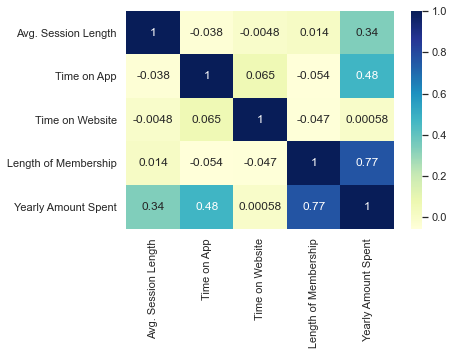

In [23]:
#Based on the info above, we build a Heatmap to have a easy view
#The darker color it has, the higher Correlation Coefficient there is

sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)

In [ ]:
#Here we can have our conclusion
#Since the Correlation Coefficient between Time On Website and Yearly Amount Spent is -0.00058
#and the one between Time On App and Yearly Amount Spent is 0.48, which is way larger than the previous one
#obviously the company should, in this case, focus App more